In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
inp_df = pd.read_csv("round-5-island-data-bottle/trades_round_3_day_0_wn.csv",delimiter=";")
inp_df2 = pd.read_csv("round-5-island-data-bottle/trades_round_3_day_1_wn.csv",delimiter=";")
inp_df3 = pd.read_csv("round-5-island-data-bottle/trades_round_3_day_2_wn.csv",delimiter=";")
price_df = pd.read_csv("round-3-island-data-bottle/prices_round_3_day_0.csv",delimiter=";")
price_df2 = pd.read_csv("round-3-island-data-bottle/prices_round_3_day_1.csv",delimiter=";")
price_df3 = pd.read_csv("round-3-island-data-bottle/prices_round_3_day_2.csv",delimiter=";")
prices_am1 = pd.DataFrame(price_df[price_df["product"] == "GIFT_BASKET"]).reset_index(drop = True)
prices_am2 = pd.DataFrame(price_df2[price_df2["product"] == "GIFT_BASKET"]).reset_index(drop = True)
prices_am3 = pd.DataFrame(price_df3[price_df3["product"] == "GIFT_BASKET"]).reset_index(drop = True)
prices_str1 = pd.DataFrame(price_df[price_df["product"] == "STRAWBERRIES"]).reset_index(drop = True)
prices_str2 = pd.DataFrame(price_df2[price_df2["product"] == "STRAWBERRIES"]).reset_index(drop = True)
prices_str3 = pd.DataFrame(price_df3[price_df3["product"] == "STRAWBERRIES"]).reset_index(drop = True)
prices_ros1 = pd.DataFrame(price_df[price_df["product"] == "ROSES"]).reset_index(drop = True)
prices_ros2 = pd.DataFrame(price_df2[price_df2["product"] == "ROSES"]).reset_index(drop = True)
prices_ros3 = pd.DataFrame(price_df3[price_df3["product"] == "ROSES"]).reset_index(drop = True)
prices_cho1 = pd.DataFrame(price_df[price_df["product"] == "CHOCOLATE"]).reset_index(drop = True)
prices_cho2 = pd.DataFrame(price_df2[price_df2["product"] == "CHOCOLATE"]).reset_index(drop = True)
prices_cho3 = pd.DataFrame(price_df3[price_df3["product"] == "CHOCOLATE"]).reset_index(drop = True)
df1_am = pd.DataFrame(inp_df[inp_df["symbol"] == "GIFT_BASKET"]).reset_index(drop=True)
df2_am = pd.DataFrame(inp_df2[inp_df2["symbol"] == "GIFT_BASKET"]).reset_index(drop=True)
df3_am = pd.DataFrame(inp_df3[inp_df3["symbol"] == "GIFT_BASKET"]).reset_index(drop=True)
df1_str = pd.DataFrame(inp_df[inp_df["symbol"] == "STRAWBERRIES"]).reset_index(drop=True)
df2_str = pd.DataFrame(inp_df2[inp_df2["symbol"] == "STRAWBERRIES"]).reset_index(drop=True)
df3_str = pd.DataFrame(inp_df3[inp_df3["symbol"] == "STRAWBERRIES"]).reset_index(drop=True)
df1_ros = pd.DataFrame(inp_df[inp_df["symbol"] == "ROSES"]).reset_index(drop=True)
df2_ros = pd.DataFrame(inp_df2[inp_df2["symbol"] == "ROSES"]).reset_index(drop=True)
df3_ros = pd.DataFrame(inp_df3[inp_df3["symbol"] == "ROSES"]).reset_index(drop=True)
df1_cho = pd.DataFrame(inp_df[inp_df["symbol"] == "CHOCOLATE"]).reset_index(drop=True)
df2_cho = pd.DataFrame(inp_df2[inp_df2["symbol"] == "CHOCOLATE"]).reset_index(drop=True)
df3_cho = pd.DataFrame(inp_df3[inp_df3["symbol"] == "CHOCOLATE"]).reset_index(drop=True)


In [4]:
df1_str.buyer.value_counts(), df1_str.seller.value_counts()

(Vinnie    794
 Remy      432
 Name: buyer, dtype: int64,
 Vinnie      429
 Remy        410
 Vladimir    387
 Name: seller, dtype: int64)

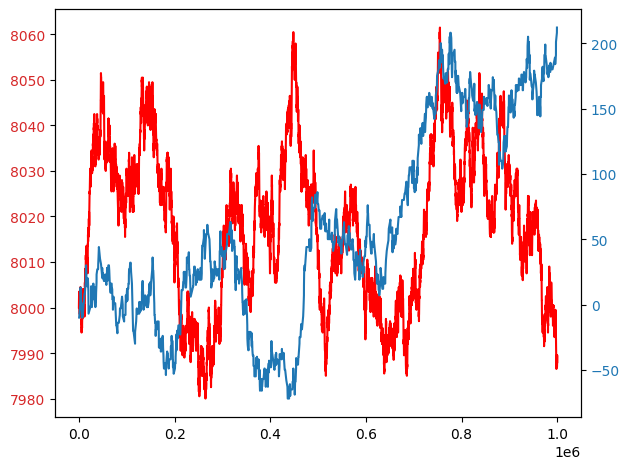

In [5]:
ddd = df1_str
ppp = prices_cho1
n = ddd.shape[0]
d = {'time': list(ddd.timestamp), 'Vinnie':[0]*n, 'Remy':[0]*n, 'Vladimir':[0]*n}
for i, row in ddd.iterrows():
    for name in d:
        if name == row.buyer == row.seller:
            #continue
            d[name][i] = d[name][i-1]
        else:
            if name == row.buyer:
                d[name][i] = d[name][i-1] + row.quantity
            elif name == row.seller:
                d[name][i] = d[name][i-1] - row.quantity
            else:
                if name != 'time':
                    d[name][i] = d[name][i-1]
pos = pd.DataFrame(d)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(ppp.timestamp, ppp.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Remy)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [6]:
df1_am.buyer.value_counts(), df1_am.seller.value_counts() #get signals when vinnie and rhianna buys here

(Vinnie      187
 Vladimir    155
 Ruby        129
 Rhianna     108
 Name: buyer, dtype: int64,
 Rhianna     201
 Vinnie      149
 Ruby        135
 Vladimir     94
 Name: seller, dtype: int64)

In [7]:
df1_am

,timestamp,buyer,seller,symbol,currency,price,quantity
0,1000,Ruby,Vinnie,GIFT_BASKET,SEASHELLS,71360.0,2
1,3500,Rhianna,Vinnie,GIFT_BASKET,SEASHELLS,71340.0,2
2,3800,Rhianna,Vinnie,GIFT_BASKET,SEASHELLS,71339.0,1
3,9500,Vinnie,Ruby,GIFT_BASKET,SEASHELLS,71386.0,1
4,13000,Ruby,Vladimir,GIFT_BASKET,SEASHELLS,71400.0,9
...,...,...,...,...,...,...,...
574,993400,Vinnie,Ruby,GIFT_BASKET,SEASHELLS,71212.0,2
575,994600,Vladimir,Ruby,GIFT_BASKET,SEASHELLS,71216.0,6
576,996800,Ruby,Vladimir,GIFT_BASKET,SEASHELLS,71205.0,8
577,998100,Rhianna,Vladimir,GIFT_BASKET,SEASHELLS,71199.0,5


In [11]:
prices_am1[prices_am1.timestamp >= 13000 - 100]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
129,0,12900,GIFT_BASKET,71391,15,71390.0,26.0,NaN,NaN,71404,15,71405.0,26.0,NaN,NaN,71397.5,0.0
130,0,13000,GIFT_BASKET,71387,11,71386.0,23.0,NaN,NaN,71400,11,71401.0,23.0,NaN,NaN,71393.5,0.0
131,0,13100,GIFT_BASKET,71384,2,71383.0,20.0,71382.0,18.0,71395,2,71396.0,20.0,71397.0,18.0,71389.5,0.0
132,0,13200,GIFT_BASKET,71393,16,71392.0,23.0,NaN,NaN,71406,16,71407.0,23.0,NaN,NaN,71399.5,0.0
133,0,13300,GIFT_BASKET,71396,2,71395.0,15.0,71394.0,16.0,71407,2,71408.0,15.0,71409.0,16.0,71401.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,999500,GIFT_BASKET,71135,12,71134.0,19.0,NaN,NaN,71148,12,71149.0,19.0,NaN,NaN,71141.5,0.0
9996,0,999600,GIFT_BASKET,71132,2,71131.0,11.0,71130.0,19.0,71137,8,71143.0,2.0,71144.0,11.0,71134.5,0.0
9997,0,999700,GIFT_BASKET,71123,2,71122.0,11.0,71121.0,23.0,71134,2,71135.0,11.0,71136.0,23.0,71128.5,0.0
9998,0,999800,GIFT_BASKET,71131,19,71130.0,21.0,NaN,NaN,71145,19,71146.0,21.0,NaN,NaN,71138.0,0.0


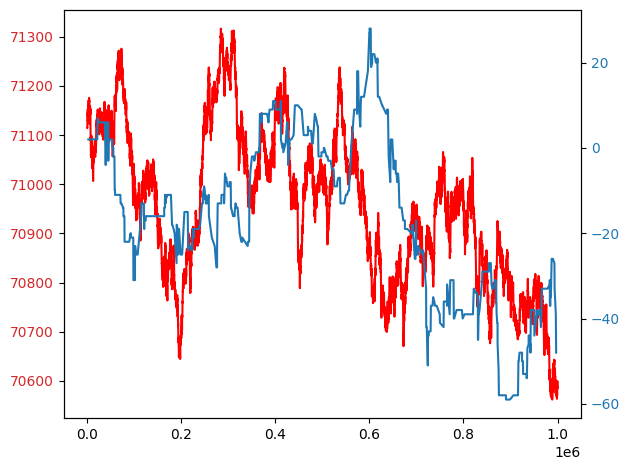

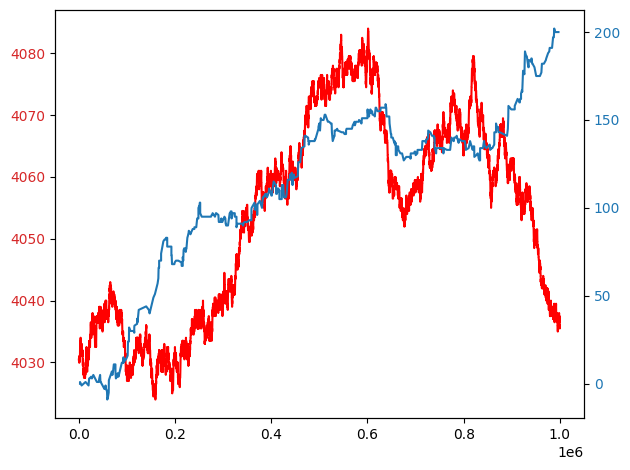

In [30]:
ddd = df2_am
ppp = prices_am2
aaa = prices_str2
n = ddd.shape[0]
d = {'time': list(ddd.timestamp), 'Vinnie':[0]*n, 'Rhianna':[0]*n, 'Ruby':[0]*n, 'Vladimir':[0]*n}
for i, row in ddd.iterrows():
    for name in d:
        if name == row.buyer and name != row.seller:
            d[name][i] = d[name][i-1] + row.quantity
        elif name == row.seller and name != row.buyer:
            d[name][i] = d[name][i-1] - row.quantity
        else:
            if name != 'time':
                d[name][i] = d[name][i-1]
pos = pd.DataFrame(d)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(ppp.timestamp, ppp.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Vinnie + pos.Ruby)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(aaa.timestamp, aaa.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Ruby + pos.Vladimir)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [41]:
df1_cho.buyer.value_counts(), df1_cho.seller.value_counts()

(Vinnie      598
 Remy        366
 Vladimir      2
 Name: buyer, dtype: int64,
 Remy        406
 Vinnie      365
 Vladimir    195
 Name: seller, dtype: int64)

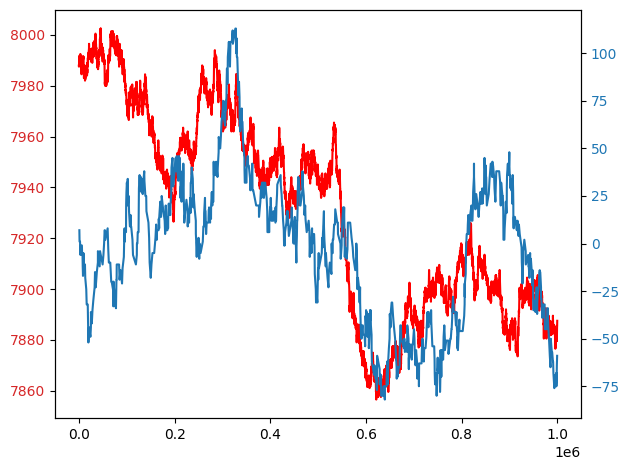

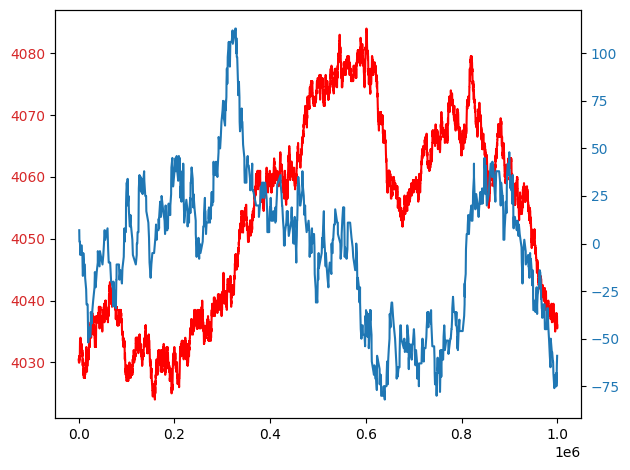

In [46]:
ddd = df2_cho
ppp = prices_cho2
aaa = prices_str2
n = ddd.shape[0]
d = {'time': list(ddd.timestamp), 'Vinnie':[0]*n, 'Rhianna':[0]*n, 'Remy':[0]*n, 'Vladimir':[0]*n}
for i, row in ddd.iterrows():
    for name in d:
        if name == row.buyer and name != row.seller:
            d[name][i] = d[name][i-1] + row.quantity
        elif name == row.seller and name != row.buyer:
            d[name][i] = d[name][i-1] - row.quantity
        else:
            if name != 'time':
                d[name][i] = d[name][i-1]
pos = pd.DataFrame(d)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(ppp.timestamp, ppp.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Remy)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(aaa.timestamp, aaa.mid_price, color = 'red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(pos.time, pos.Remy)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()